# I] Import and options


In [38]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# have text as text and not curve in .svg
matplotlib.rcParams['svg.fonttype'] = 'none'
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':24, 'xtick.labelsize':20, 
                            'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [39]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [40]:
%%time
#DL + open
path = input_file_directory + "mefs/mefs_proliferation/exp2_proliferation.csv"
prolif_df = pandas.read_csv(path, sep = ";")
#change comma to dot
prolif_df = prolif_df.astype(str)
prolif_df = prolif_df.apply(lambda x: x.str.replace(',','.'))
#convert to float
prolif_df = prolif_df.astype(float)
prolif_df = prolif_df.iloc[:31,:]
print(prolif_df.shape)
prolif_df.tail()

(31, 49)
Wall time: 21 ms


Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
26     52.0              85.69460          78.60030           81.41359   
27     54.0              86.74384          80.15505           82.41169   
28     56.0              89.09334          92.93846           94.77729   
29     58.0              92.10947          85.85320           90.08450   
30     60.0              93.58721          92.98689           94.72569   

    dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
26               92.55900           94.26760               97.52869   
27               91.28027           92.08286               95.47397   
28               97.78130           97.29813               98.57506   
29               96.05569           95.85699               98.41440   
30               98.30971           98.67882               99.33318   

    Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
26             46.02570         39.98709          37.41099  ...   
27             40.07405         34.04238          31.98980  ...   
28             40.80393         31.53383          29.32455  ...   
29             37.43993         31.86169          30.36393  ...   
30             39.16290         33.85468          30.93474  ...   

    WT1 + Starvation + DMSO (Std Err Img)  \
26                               11.73978   
27                               12.54825   
28                               24.26303   
29                               14.06151   
30                               16.66569   

    dVSR(1) + Starvation + DMSO (Std Err Img)  \
26                                   3.105790   
27                                   4.488354   
28                                  10.453150   
29                                   4.899619   
30                                   3.205701   

    WT2 + Starvation + DMSO (Std Err Img)  \
26                               8.205128   
27                               6.034337   
28                               9.995469   
29                               7.065463   
30                               6.561261   

    dVSR(2) + Starvation + DMSO (Std Err Img)  \
26                                   12.22082   
27                                   10.43569   
28                                   15.44943   
29                                   10.51716   
30                                   10.37676   

    Normal + Starvation + BAF (Std Err Img)  \
26                                 3.003003   
27                                 3.132696   
28                                 4.561829   
29                                 2.545754   
30                                 2.876211   

    EV + Starvation + BAF (Std Err Img)  WT1 + Starvation + BAF (Std Err Img)  \
26                             5.876376                              0.847836   
27                             4.774844                              0.621607   
28                             6.711931                              1.353637   
29                             5.339599                              0.969155   
30                             5.839258                              0.729399   

    dVSR(1) + Starvation + BAF (Std Err Img)  \
26                                  7.138566   
27                                  6.104240   
28                                  5.047359   
29                                  6.250226   
30                                  8.226239   

    WT2 + Starvation + BAF (Std Err Img)  \
26                              7.456983   
27                              4.830581   
28                              7.395585   
29                              7.712258   
30                              7.556342   

    dVSR(2) + Starvation + BAF (Std Err Img)  
26                                  0.795645  
27                                  0.820528  
28                                  1.130834  
29                                  0.466084  
30                                  0.

In [41]:
#I have 6 cell lines per condition and 4 conditions
#List of Columns
##select RICH DMEM with only dmso
prolif_rich_DMSO = prolif_df.iloc[:,1:7].columns
##select RICH DMEM with only baf
prolif_rich_BAF = prolif_df.iloc[:,7:13].columns
##df with STARV with only dmso
prolif_starv_DMSO = prolif_df.iloc[:,13:19].columns
##df with STARV with only baf
prolif_starv_BAF = prolif_df.iloc[:,19:25].columns

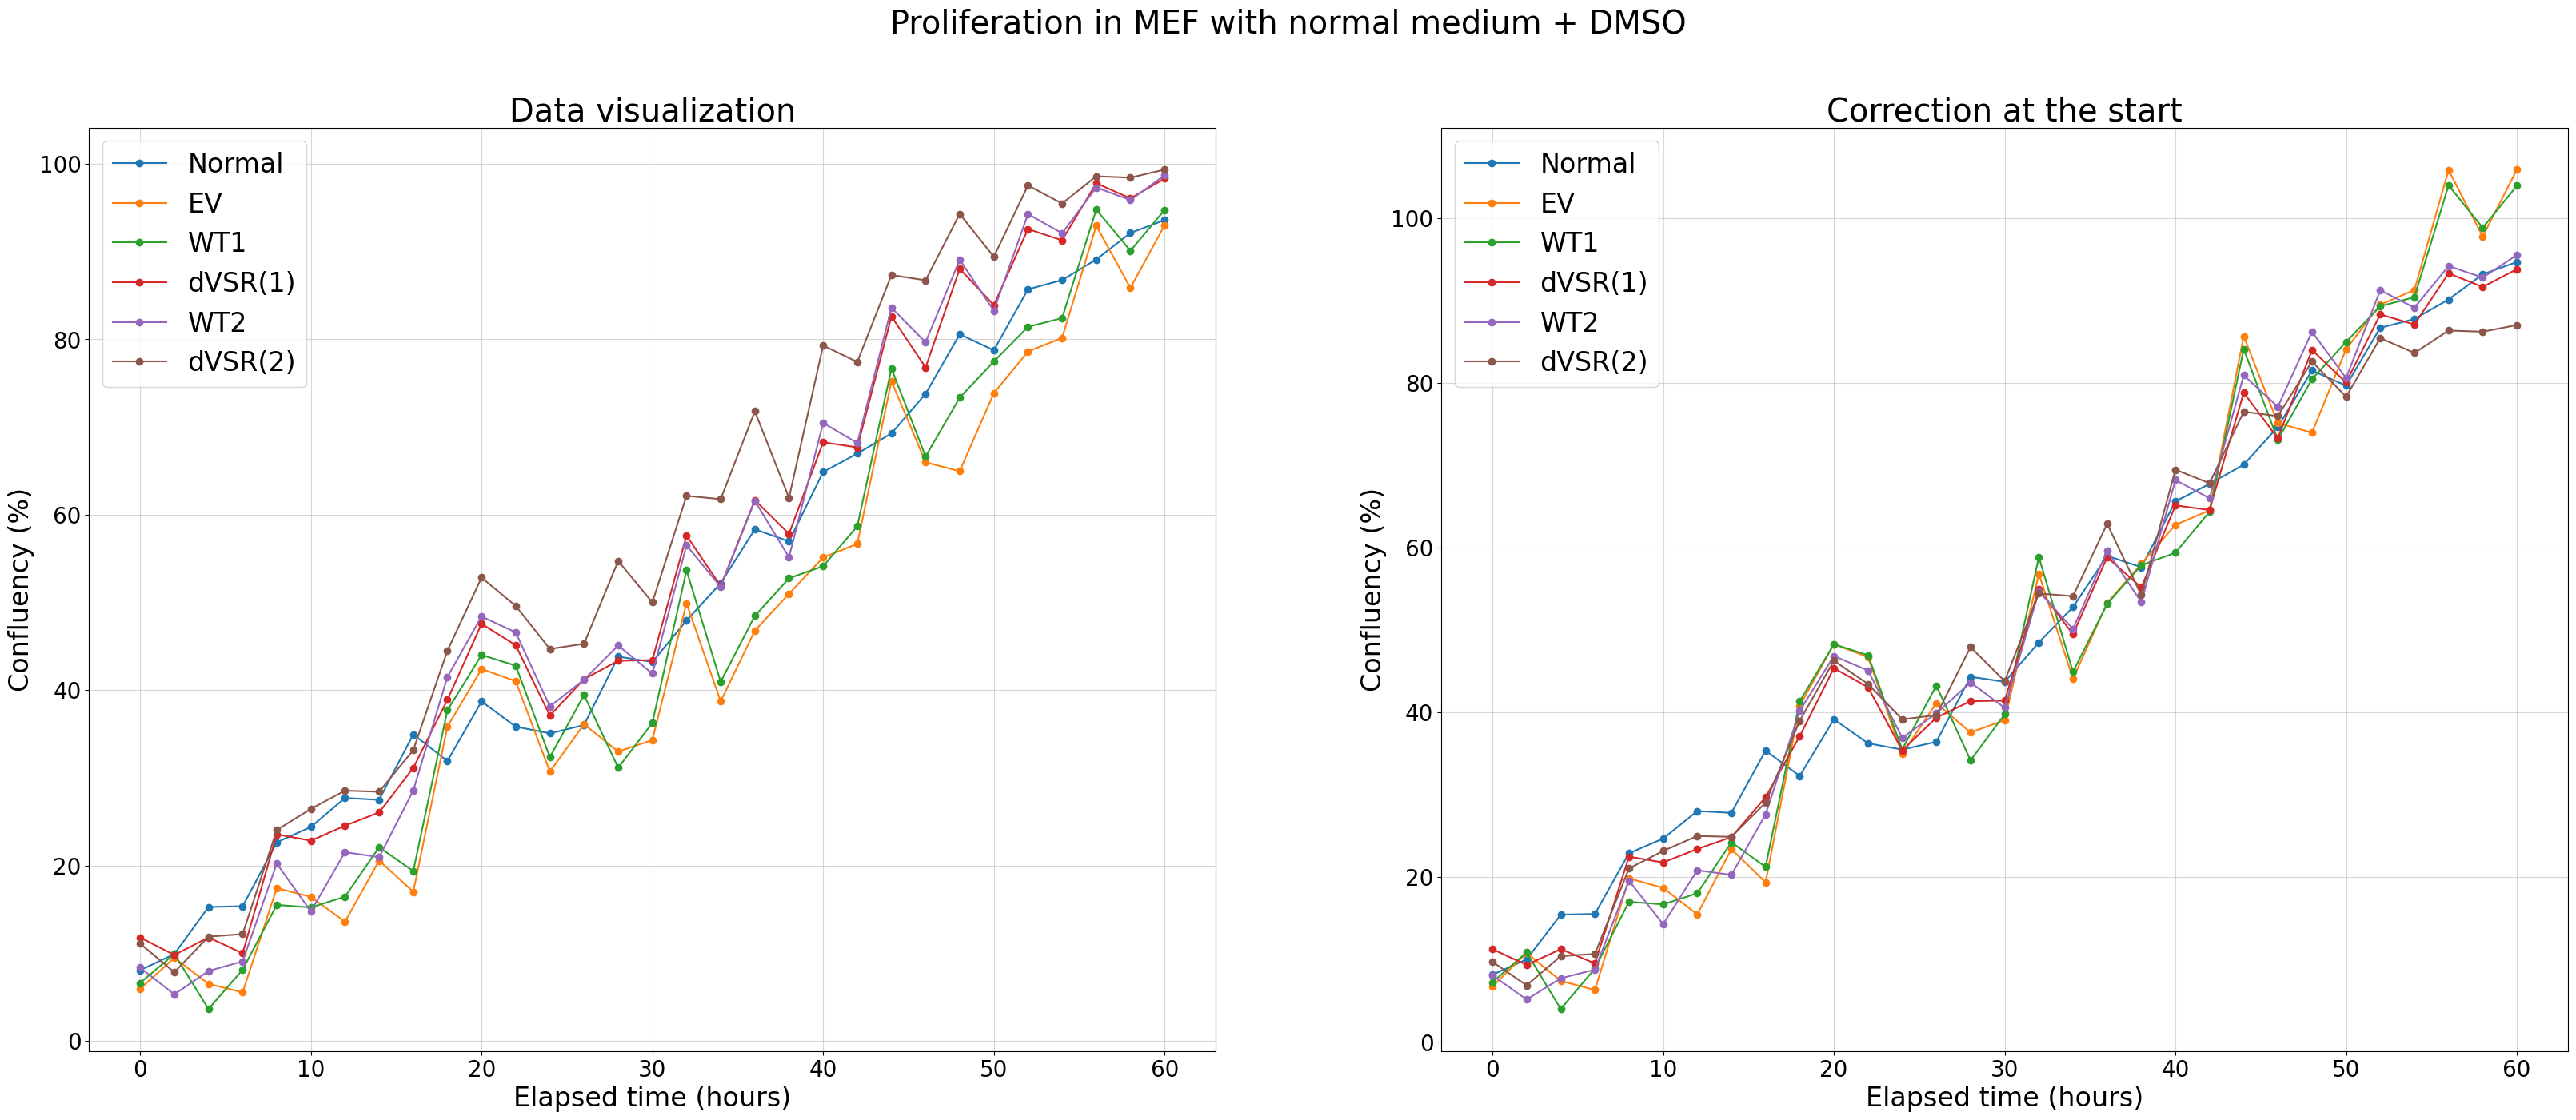

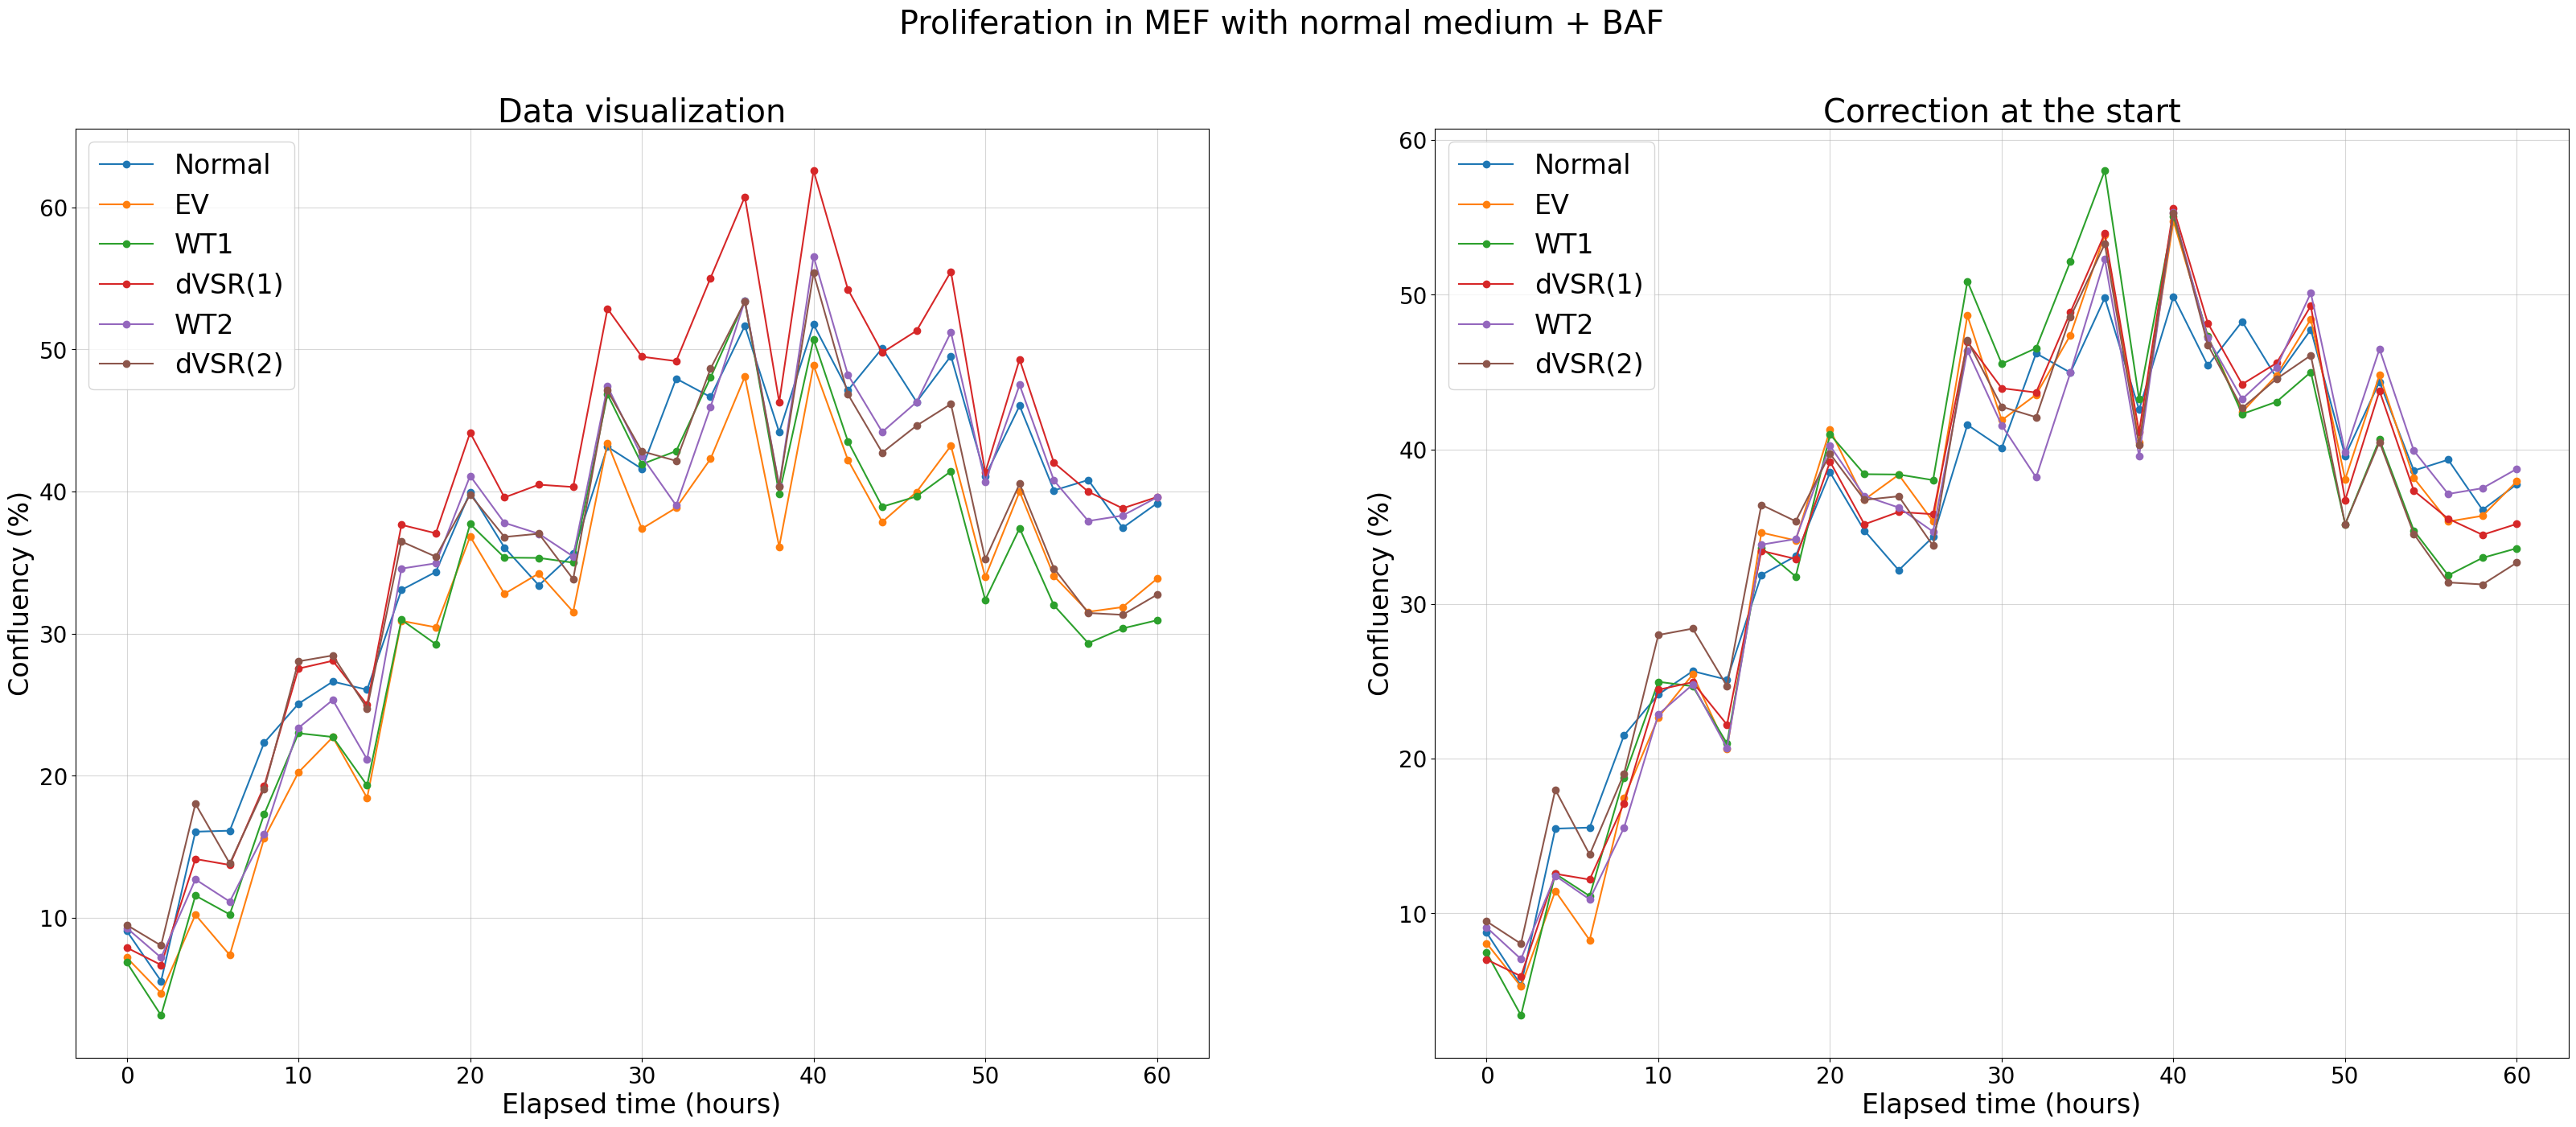

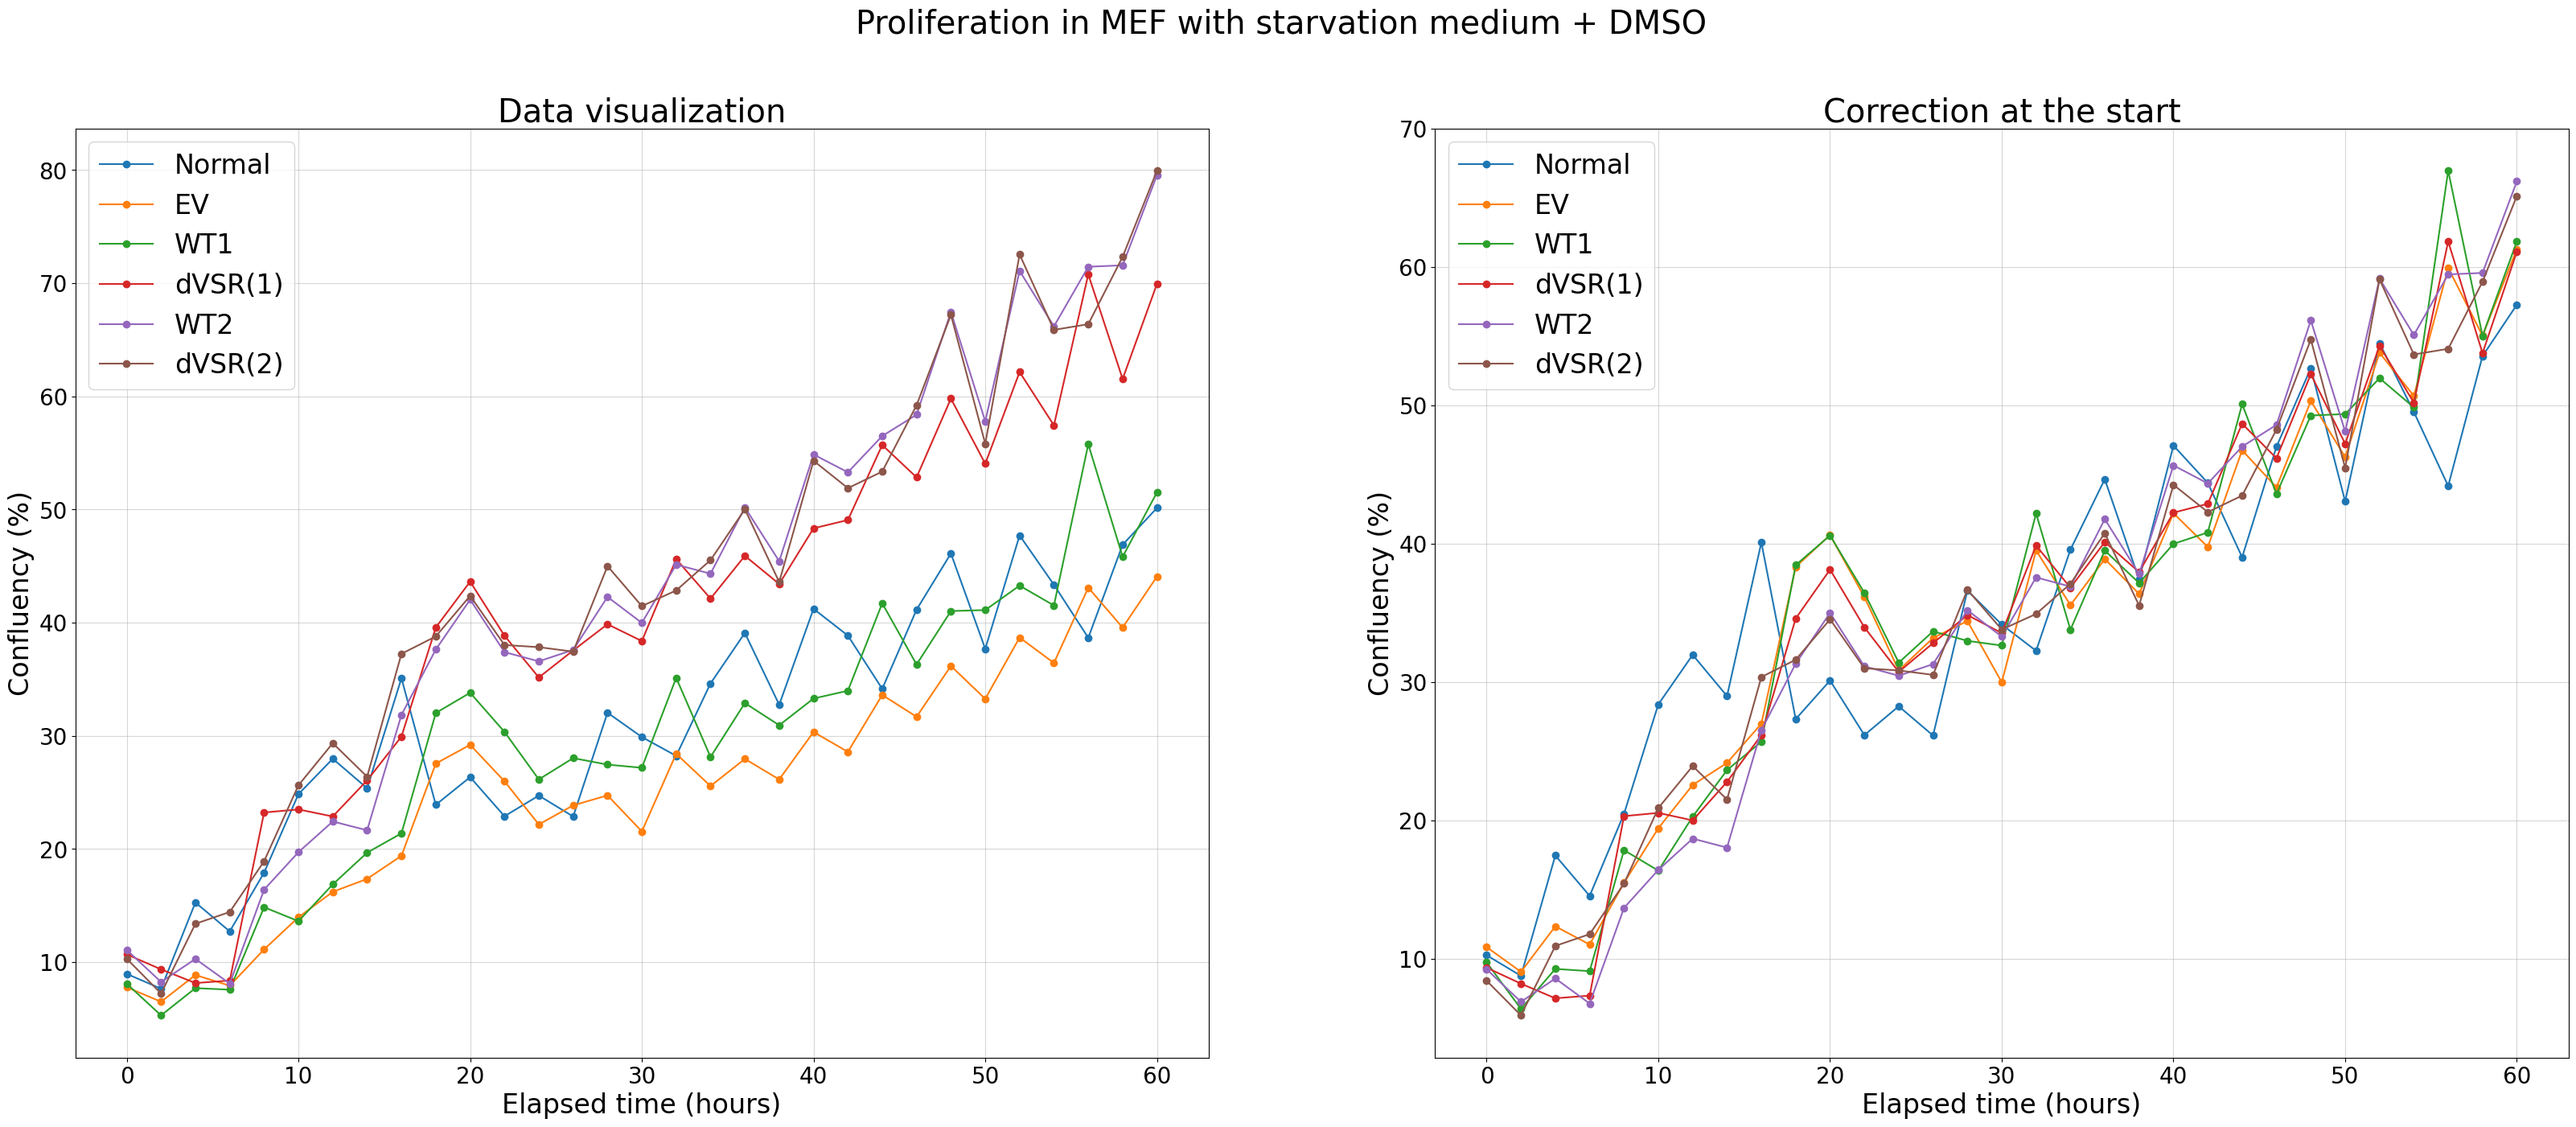

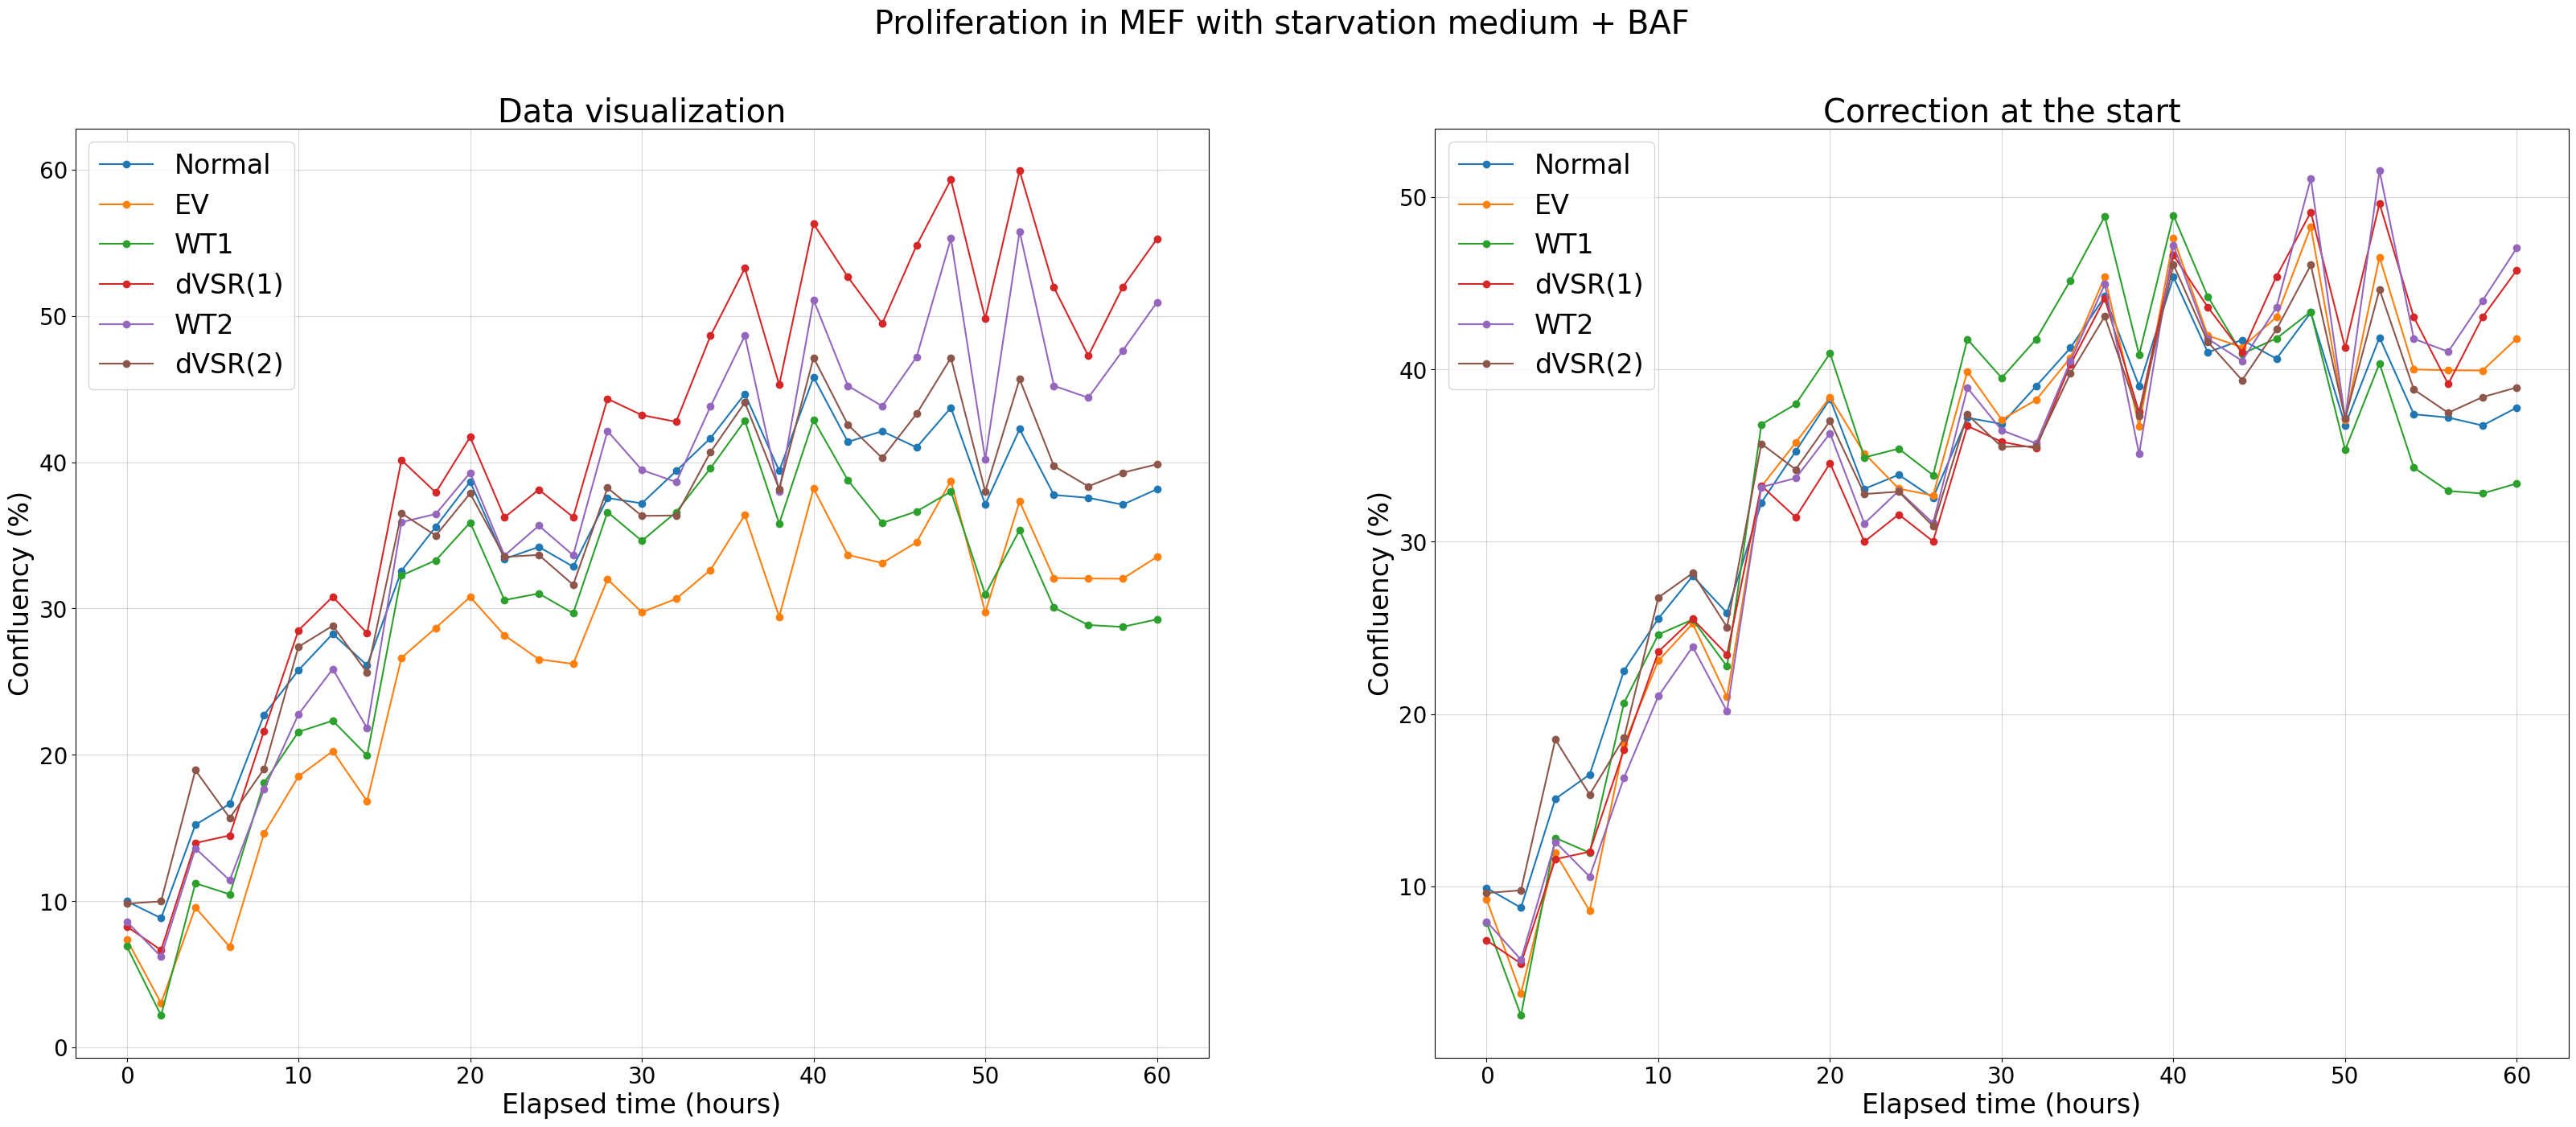

In [42]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    for column in col_selection:     
        label_ = column.split(' ')[0]
        
        #graph 1, data visualization
        ax[0].plot(prolif_df['Elapsed'], prolif_df[column], 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Data visualization")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
      
        #graph 2, Correction at the start
        ax[1].plot(prolif_df['Elapsed'], corrected_data[column], 'o-', label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Correction at the start")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
    print()

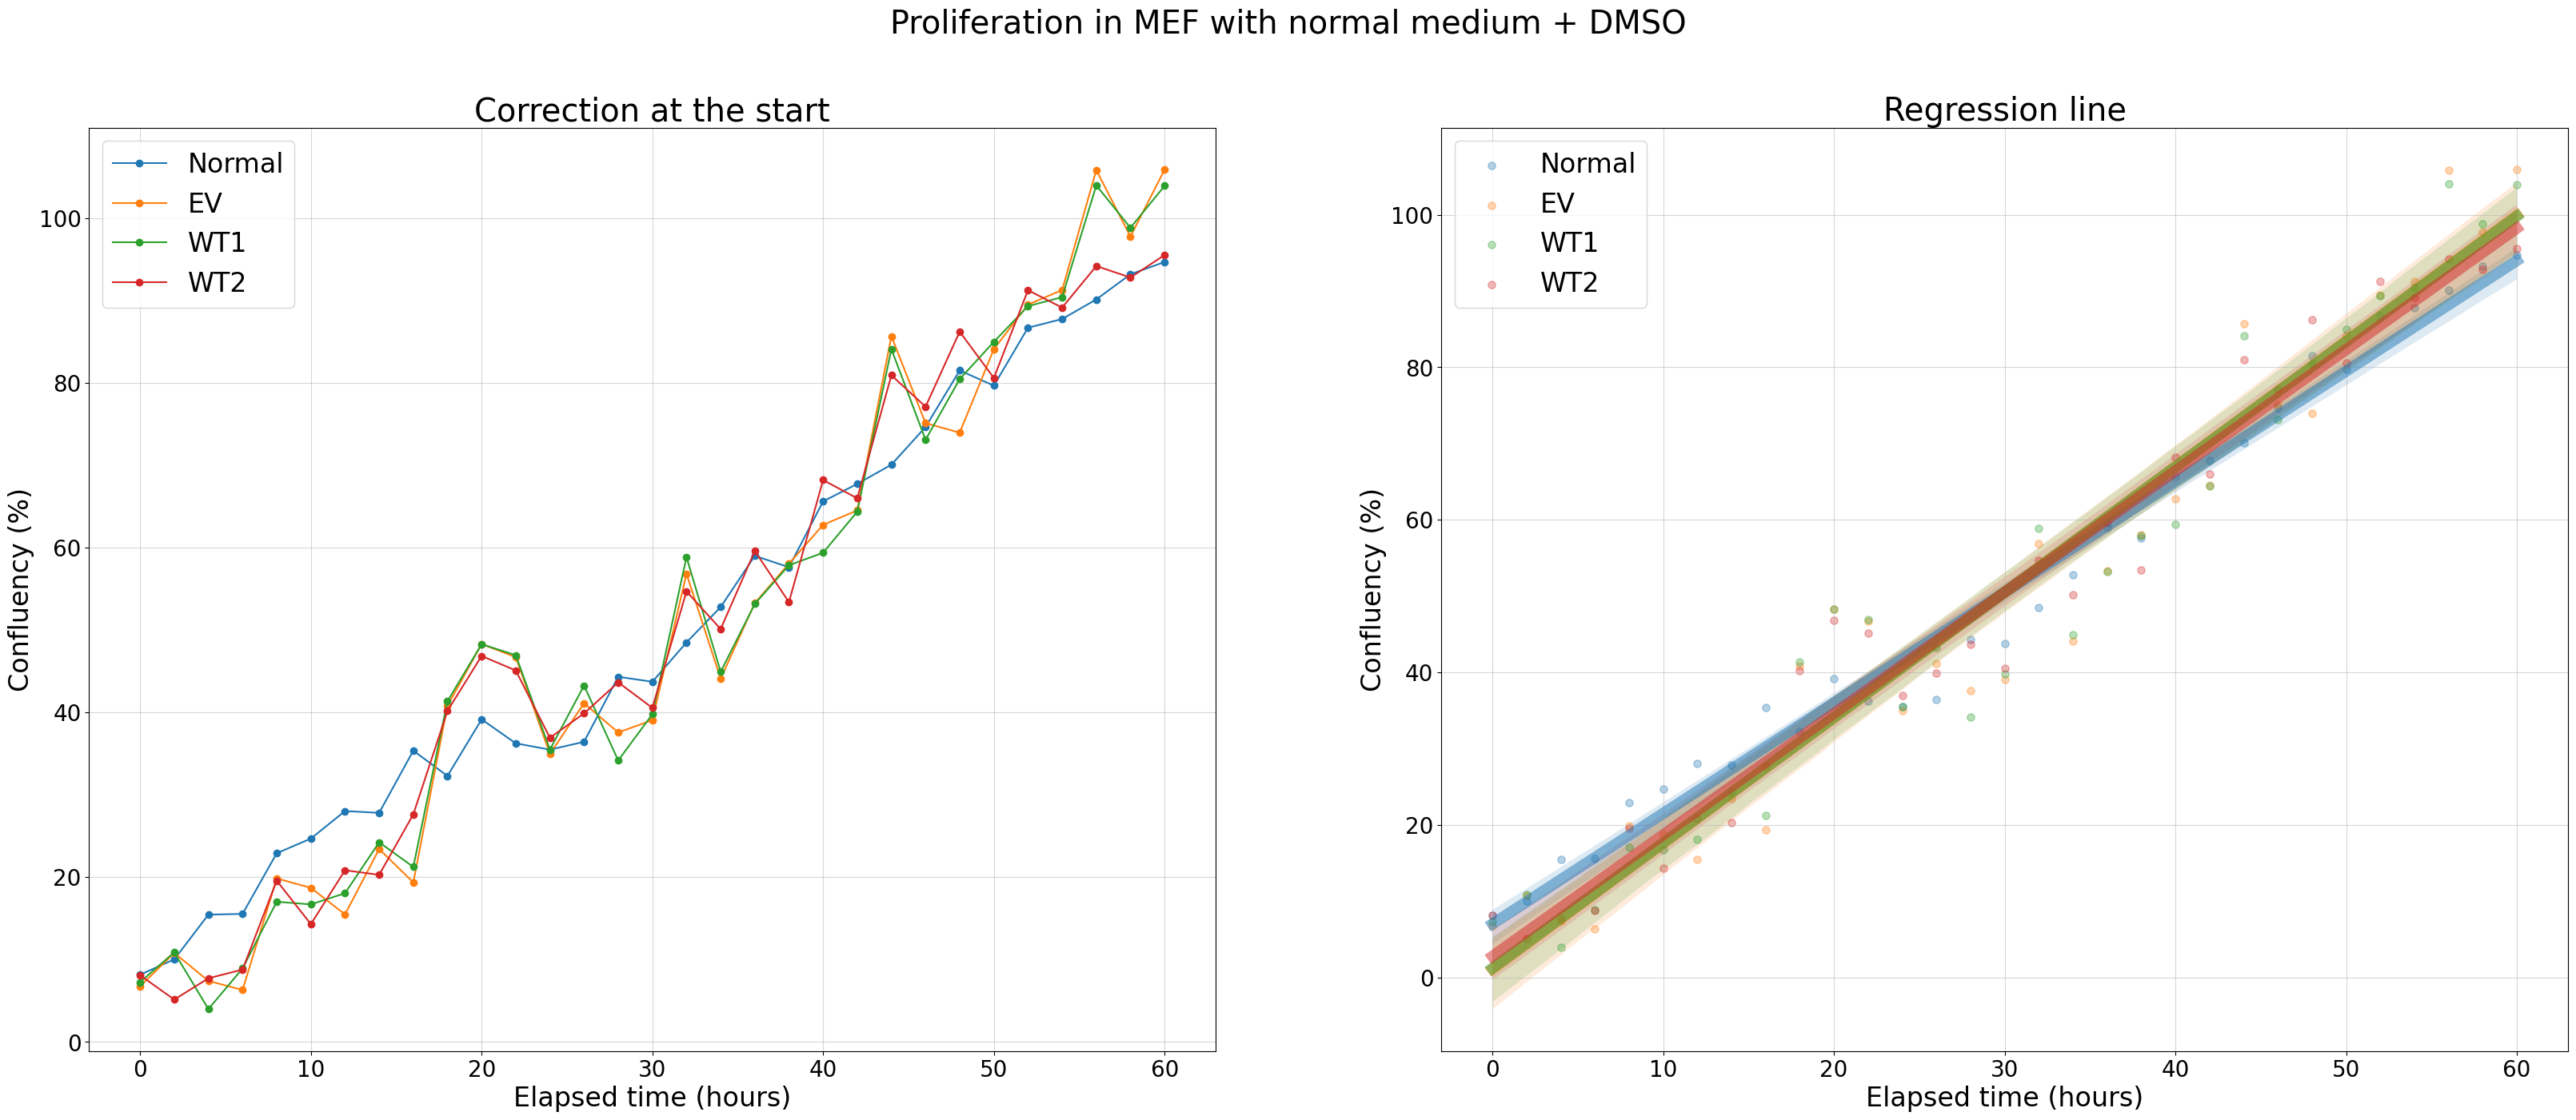

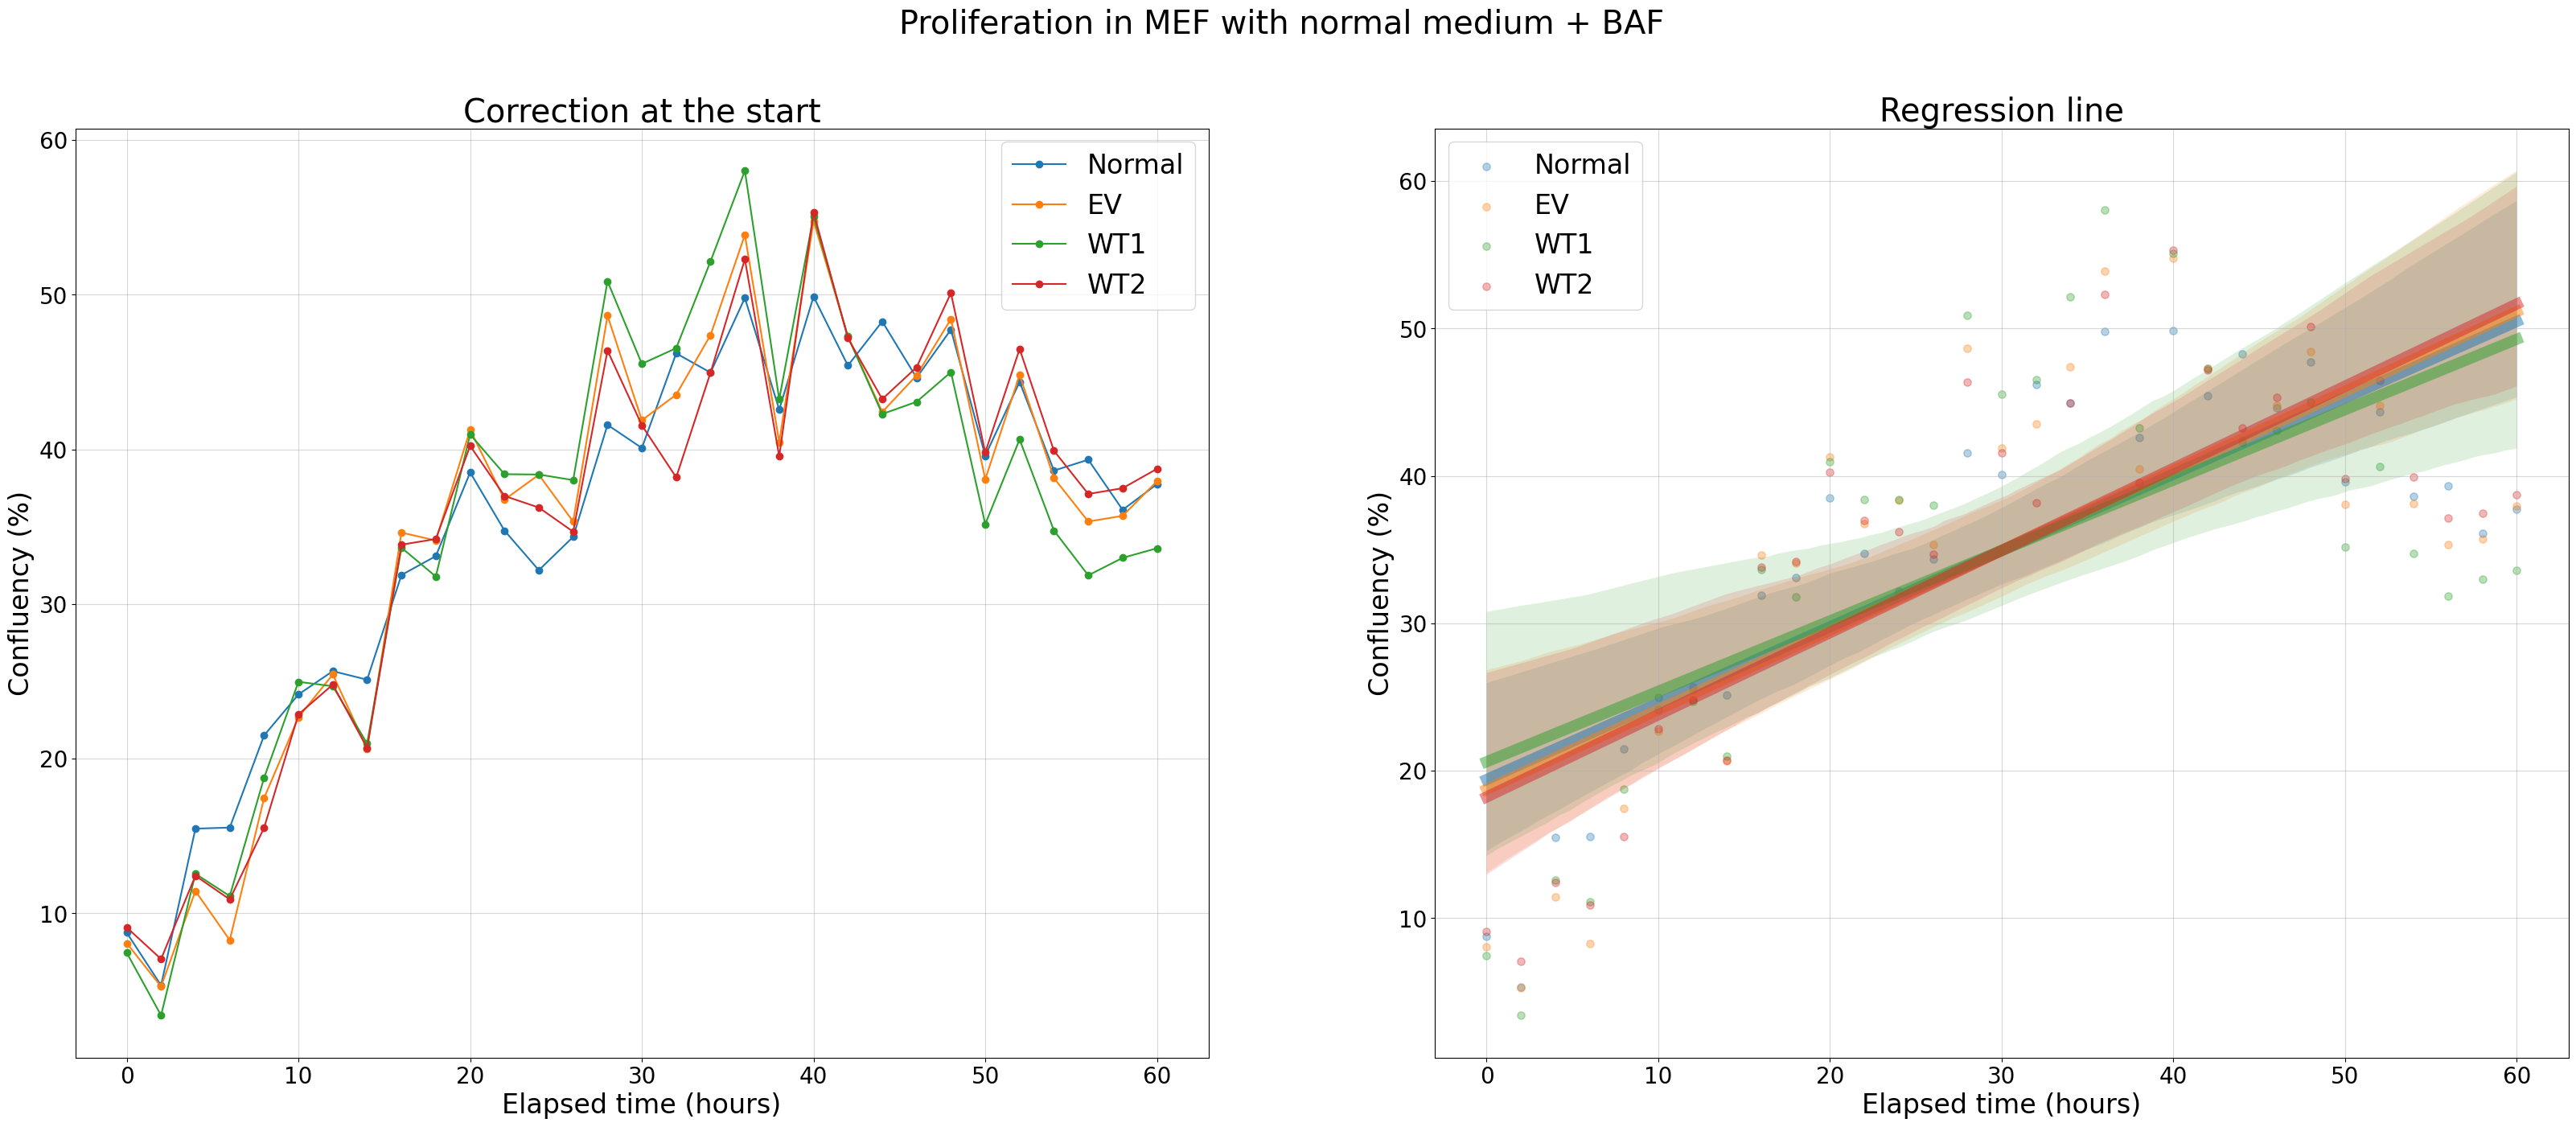

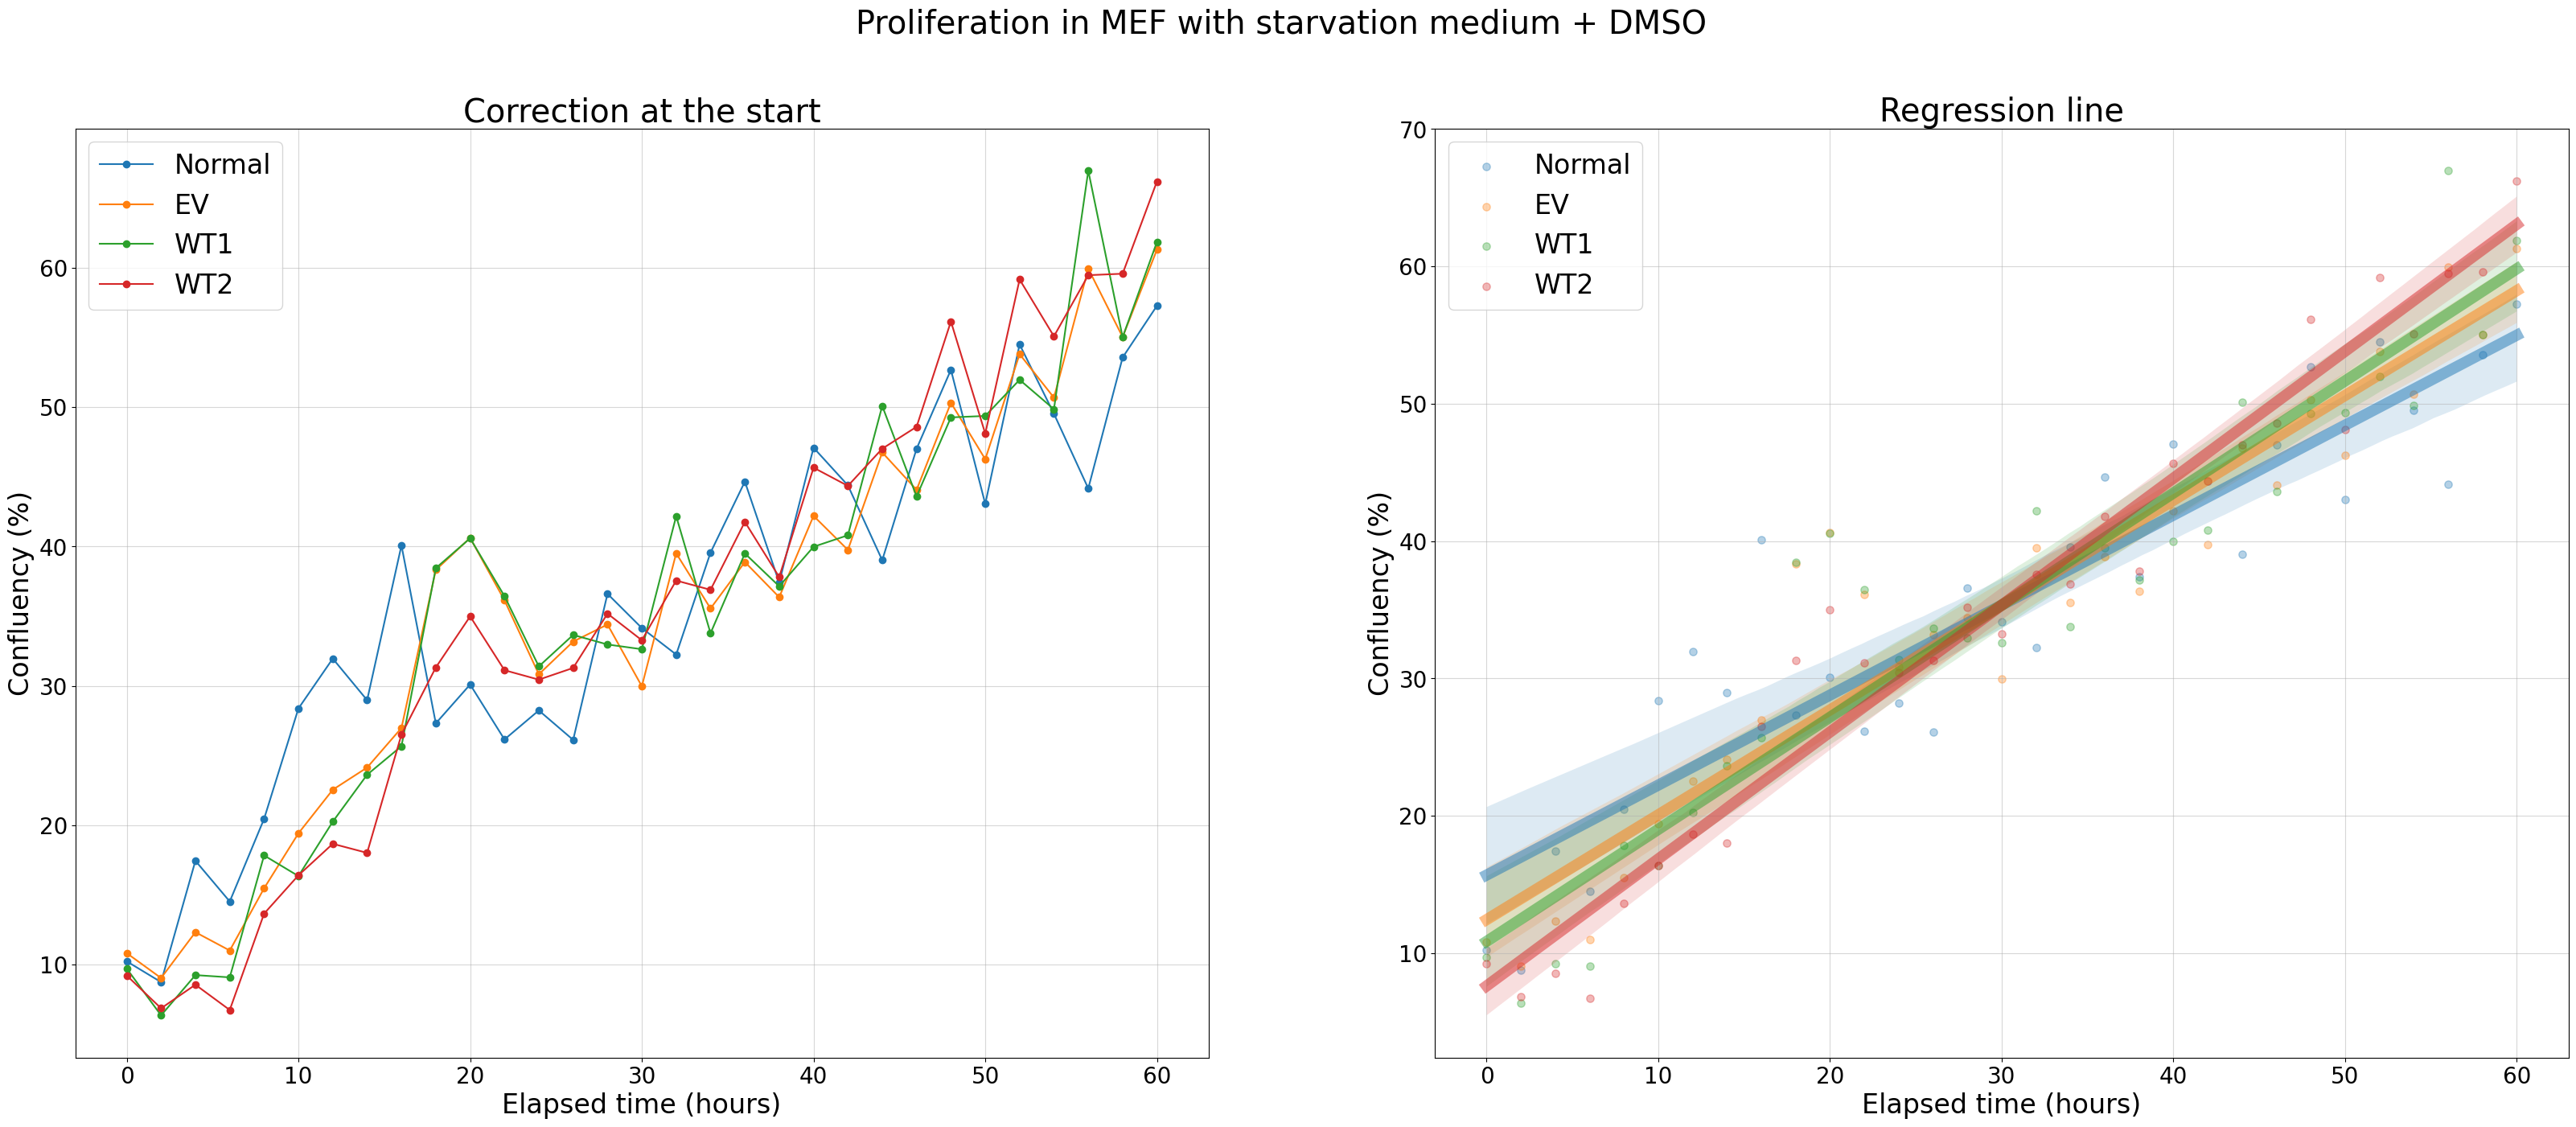

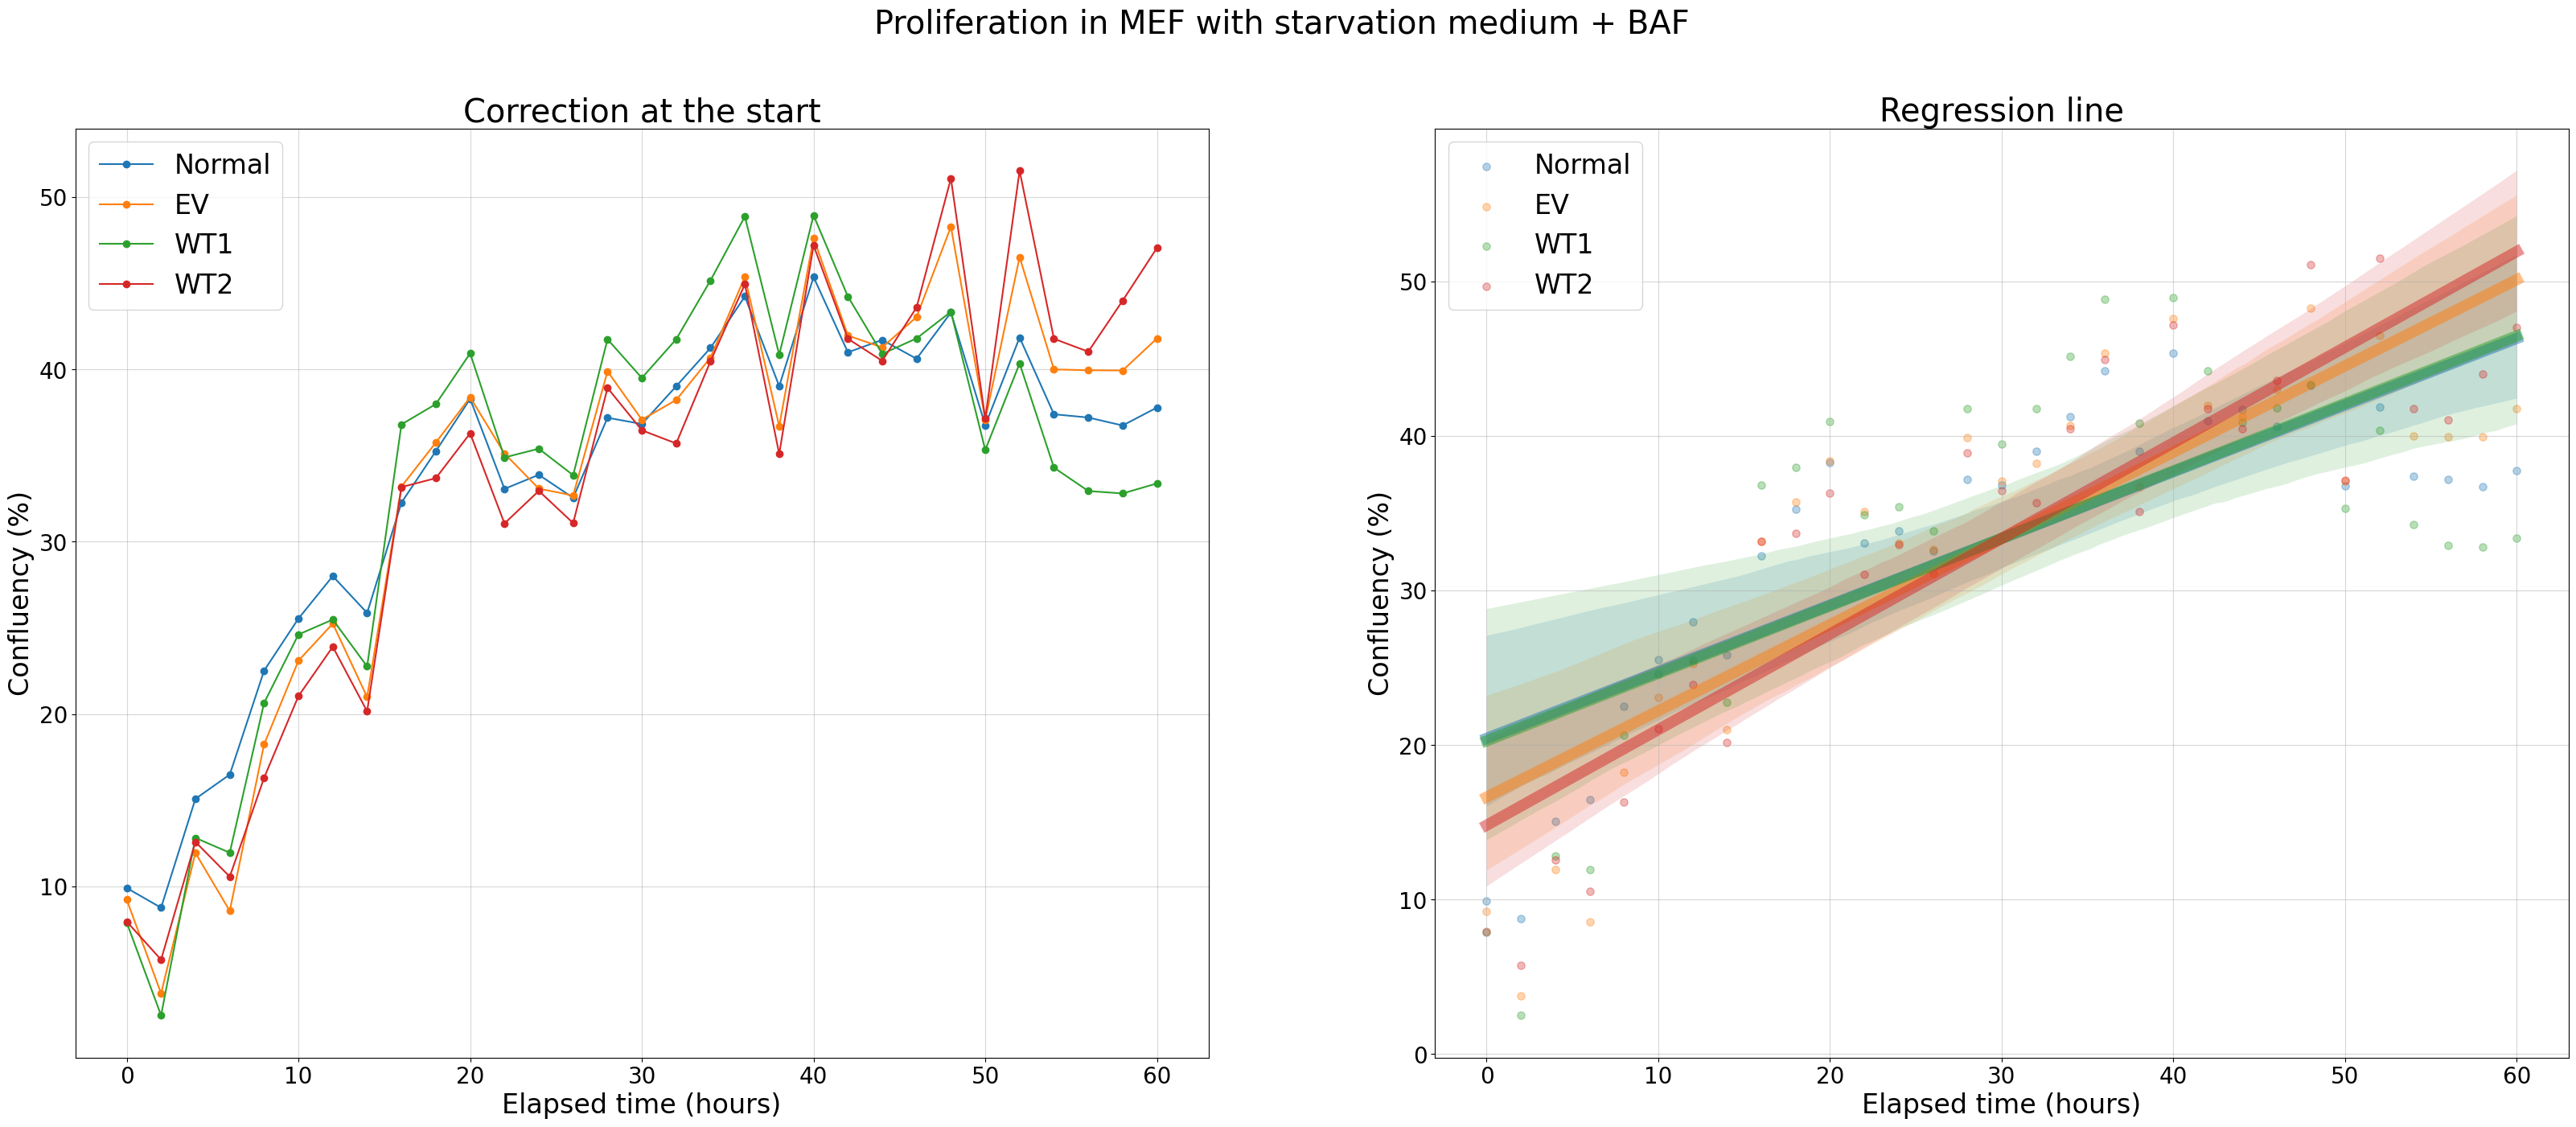

In [43]:
#Visualization of all data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['rich_dmso', 'rich_baf', 'starv_dmso', 'starv_baf']

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]
    drug = drugs[i]
    
    fig, ax = plt.subplots(1,2, figsize=(40,15))
    fig.suptitle('Proliferation in MEF'+ condition_label)
    
    list_ = [0,1,2,4] #represent norm/EV/WT1/WT2 delete list_ to have all
    for column in col_selection[list_]: 
        label_ = column.split(' ')[0]
           
        ##Correction
        shift = prolif_df[col_selection].mean()   #list of means for all columns
        general_mean = prolif_df[col_selection].mean().mean() #mean of means
        relative_mu = shift/general_mean #correction to apply for each column
        corrected_data = prolif_df[col_selection]/relative_mu #corrected data
        
        #graph 2, Correction at the start
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        ax[0].plot(x, y, 'o-', label= label_)
        ax[0].grid(alpha = 0.5)
        ax[0].legend()
        ax[0].set_title("Correction at the start")
        ax[0].set_ylabel('Confluency (%)')
        ax[0].set_xlabel('Elapsed time (hours)')
        
        #graph 3, Regression lines
        x=prolif_df['Elapsed']
        y=corrected_data[column]
        seaborn.regplot(x=x, y=y,scatter=True, line_kws={'linewidth':10, 'alpha':0.5},
                        scatter_kws={'s':45, 'alpha':1/3}, label= label_)
        ax[1].grid(alpha = 0.5)
        ax[1].legend()
        ax[1].set_title("Regression line")
        ax[1].set_ylabel('Confluency (%)')
        ax[1].set_xlabel('Elapsed time (hours)')
            
        #save the graphs
        path = output_file_directory + 'ATG7/Proliferation/exp2/graph_exp2_'    
#         fig.savefig(path+drug+'.svg')
        print()

In [44]:
#Create df with corrected data
columns_list = [prolif_rich_DMSO, prolif_rich_BAF, prolif_starv_DMSO, prolif_starv_BAF]
conditions = [' with normal medium + DMSO', ' with normal medium + BAF',
              ' with starvation medium + DMSO', ' with starvation medium + BAF']
drugs = ['dmso', 'baf', 'dmso', 'baf']

corrected_dfs = []

for i in range(len(columns_list)) :
    col_selection = columns_list[i]
    condition_label = conditions[i]

    label_ = column.split(' ')[0]
              
    ##Correction
    shift = prolif_df[col_selection].mean()   #list of means for all columns
    general_mean = prolif_df[col_selection].mean().mean() #mean of means
    relative_mu = shift/general_mean #correction to apply for each column
    corrected_data = prolif_df[col_selection]/relative_mu #corrected data
    corrected_dfs.append(corrected_data)

In [45]:
#convert corrected results as dataframe
corrected_combined_dfs = pandas.concat(corrected_dfs, axis=1)
corrected_combined_dfs.insert(0, "Elapsed", prolif_df["Elapsed"])

corrected_combined_dfs.head()

Elapsed  Normal + DMEM + DMSO  EV + DMEM + DMSO  WT1 + DMEM + DMSO  \
0      0.0              8.154483          6.747998           7.252581   
1      2.0             10.014385         10.795709          10.863960   
2      4.0             15.446939          7.400775           3.980244   
3      6.0             15.535115          6.295032           8.905454   
4      8.0             22.900491         19.841772          17.012887   

   dVSR(1) + DMEM + DMSO  WT2 + DMEM + DMSO  dVSR(2) + DMEM + DMSO  \
0              11.246918           8.079811               9.718132   
1               9.348784           5.132889               6.857050   
2              11.258417           7.717917              10.412592   
3               9.527982           8.775545              10.670352   
4              22.483769          19.569837              21.057622   

   Normal + DMEM + BAF  EV + DMEM + BAF  WT1 + DMEM + BAF  ...  \
0             8.753628         8.072136          7.457991  ...   
1             5.348694         5.272551          3.409569  ...   
2            15.479487        11.448146         12.562347  ...   
3            15.547918         8.272532         11.122392  ...   
4            21.505855        17.460318         18.767553  ...   

   WT1 + Starvation + DMSO  dVSR(1) + Starvation + DMSO  \
0                 9.714051                     9.335817   
1                 6.357351                     8.179373   
2                 9.246755                     7.122264   
3                 9.084823                     7.314633   
4                17.833387                    20.292710   

   WT2 + Starvation + DMSO  dVSR(2) + Starvation + DMSO  \
0                 9.218475                     8.391675   
1                 6.862658                     5.887173   
2                 8.556490                    10.909897   
3                 6.743423                    11.757629   
4                13.655108                    15.412955   

   Normal + Starvation + BAF  EV + Starvation + BAF  WT1 + Starvation + BAF  \
0                   9.900498               9.225185                7.895383   
1                   8.757034               3.782659                2.507405   
2                  15.075960              11.937957               12.810057   
3                  16.484807               8.570831               11.949421   
4                  22.518858              18.241703               20.642992   

   dVSR(1) + Starvation + BAF  WT2 + Starvation + BAF  \
0                    6.859335                7.952481   
1                    5.514215                5.739806   
2                   11.574816               12.577716   
3                   12.006414               10.558577   
4                   17.925901               16.299751   

   dVSR(2) + Starvation + BAF  
0                    9.609766  
1                    9.765594  
2                   18.522832  
3                   15.328579  
4                   18.608914  

[5 rows x 25 columns]

In [46]:
df_30h = corrected_combined_dfs[corrected_combined_dfs['Elapsed'] == 30.0]
df_30h = df_30h.melt(id_vars=["Elapsed"], var_name="conditions")
df_30h['experiment'] = "exp2"
df_30h

Elapsed                   conditions      value experiment
0      30.0         Normal + DMEM + DMSO  43.717941       exp2
1      30.0             EV + DMEM + DMSO  39.059893       exp2
2      30.0            WT1 + DMEM + DMSO  39.773343       exp2
3      30.0        dVSR(1) + DMEM + DMSO  41.431491       exp2
4      30.0            WT2 + DMEM + DMSO  40.550530       exp2
5      30.0        dVSR(2) + DMEM + DMSO  43.805830       exp2
6      30.0          Normal + DMEM + BAF  40.085042       exp2
7      30.0              EV + DMEM + BAF  41.879791       exp2
8      30.0             WT1 + DMEM + BAF  45.526608       exp2
9      30.0         dVSR(1) + DMEM + BAF  43.947450       exp2
10     30.0             WT2 + DMEM + BAF  41.554954       exp2
11     30.0         dVSR(2) + DMEM + BAF  42.752735       exp2
12     30.0   Normal + Starvation + DMSO  34.149090       exp2
13     30.0       EV + Starvation + DMSO  29.971228       exp2
14     30.0      WT1 + Starvation + DMSO  32.628669       exp2
15     30.0  dVSR(1) + Starvation + DMSO  33.530089       exp2
16     30.0      WT2 + Starvation + DMSO  33.272902       exp2
17     30.0  dVSR(2) + Starvation + DMSO  33.783660       exp2
18     30.0    Normal + Starvation + BAF  36.835828       exp2
19     30.0        EV + Starvation + BAF  37.087923       exp2
20     30.0       WT1 + Starvation + BAF  39.508040       exp2
21     30.0   dVSR(1) + Starvation + BAF  35.800232       exp2
22     30.0       WT2 + Starvation + BAF  36.471731       exp2
23     30.0   dVSR(2) + Starvation + BAF  35.510714       exp2

In [47]:
df_30h.insert(1, "Drug", df_30h['conditions'].str.split('+').str[2])
df_30h.insert(1, "Medium", df_30h['conditions'].str.split('+').str[1])
df_30h.insert(1, "samples", df_30h['conditions'].str.split('+').str[0])

df_30h.pop("conditions")
df_30h

Elapsed   samples        Medium   Drug      value experiment
0      30.0   Normal          DMEM    DMSO  43.717941       exp2
1      30.0       EV          DMEM    DMSO  39.059893       exp2
2      30.0      WT1          DMEM    DMSO  39.773343       exp2
3      30.0  dVSR(1)          DMEM    DMSO  41.431491       exp2
4      30.0      WT2          DMEM    DMSO  40.550530       exp2
5      30.0  dVSR(2)          DMEM    DMSO  43.805830       exp2
6      30.0   Normal          DMEM     BAF  40.085042       exp2
7      30.0       EV          DMEM     BAF  41.879791       exp2
8      30.0      WT1          DMEM     BAF  45.526608       exp2
9      30.0  dVSR(1)          DMEM     BAF  43.947450       exp2
10     30.0      WT2          DMEM     BAF  41.554954       exp2
11     30.0  dVSR(2)          DMEM     BAF  42.752735       exp2
12     30.0   Normal    Starvation    DMSO  34.149090       exp2
13     30.0       EV    Starvation    DMSO  29.971228       exp2
14     30.0      WT1    Starvation    DMSO  32.628669       exp2
15     30.0  dVSR(1)    Starvation    DMSO  33.530089       exp2
16     30.0      WT2    Starvation    DMSO  33.272902       exp2
17     30.0  dVSR(2)    Starvation    DMSO  33.783660       exp2
18     30.0   Normal    Starvation     BAF  36.835828       exp2
19     30.0       EV    Starvation     BAF  37.087923       exp2
20     30.0      WT1    Starvation     BAF  39.508040       exp2
21     30.0  dVSR(1)    Starvation     BAF  35.800232       exp2
22     30.0      WT2    Starvation     BAF  36.471731       exp2
23     30.0  dVSR(2)    Starvation     BAF  35.510714       exp2

In [48]:
df_dmem_30h = df_30h.loc[:11]
df_starvation_30h = df_30h.loc[12:]

In [49]:
#save Corrected_data
path = output_file_directory + 'ATG7/MEF_Huh7/Proliferation/data_for_input/'
df_dmem_30h.to_csv(path+'df_dmem_30h_exp2.csv',sep = ",", index=False)
df_starvation_30h.to_csv(path+'df_starvation_30h_exp2.csv',sep = ",", index=False)